In [30]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

<b><font size="7" color="red">ch12. 데이터시각화</font></b>
- 시각화 라이브러리 : matplotlib, seaborn, folium(지도시각화)
- matplotlib : 파이썬에서 가장 많이 사용하는 시각화 라이브러리. 판다스 내부에 포함
- seaborn : matplotlib기반으로 다양한 색, 테마, 챠트 기능. groupby 기능을 추가한 라이브러리
# 1절 matplotlib
- https://pypi.org/project/matplotlib/ 
- https://matplotlib.org/stable/api/pyplot_summary.html
## 1.1 패키지 import 및 기본 설정

In [2]:
import matplotlib
matplotlib.__version__

'3.7.0'

In [1]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
# 한글설정(windows mac)
plt.rc('font', family='Malgun Gothic') # 윈도우즈
# plt.rc('font', family='AppleGothic') # mac
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지
# warning 안보이게
import warnings
warnings.filterwarnings(action='ignore') # warning 안 보이게

## 1.2 그래프 그리기
- matplotlib으로 그래프 그리기 위한 단계
    1) 데이터 준비 <br>
    2) 그래프 생성 <br>
    3) 그래프 함수로 그리기 <br>
    4) 그래프 커스터마이징 <br>
    5) 그래프 출력 및 저장<br>

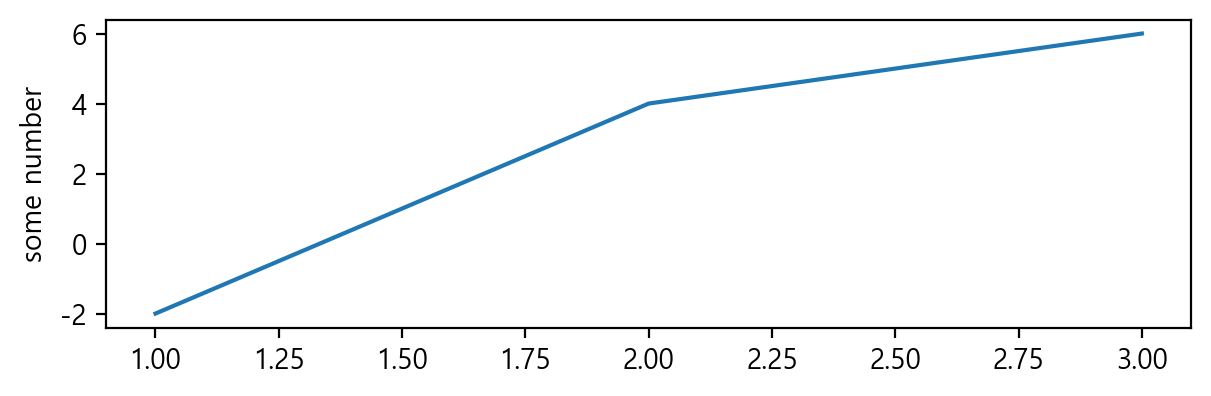

In [2]:
x = [1, 2, 3] #1)
y = [-2, 4, 6]
plt.figure(figsize=(7, 2)) # 2)그래프 객체 생성 사이즈는 인치
plt.plot(x, y)  # 3)
plt.ylabel('some number') # 4)커스터마이징
# plt.show() # 5) 출력
plt.savefig('data/ch12.png', bbox_inches='tight') # 파일 출력

## 1.3 그래프 영역 나누기
### 1) subplot()함수로 서브플롯 추가

In [3]:
import numpy as np
x = np.arange(0, 10, 0.1) # np.linspace(0, 9.9, 100)
x.shape

(100,)

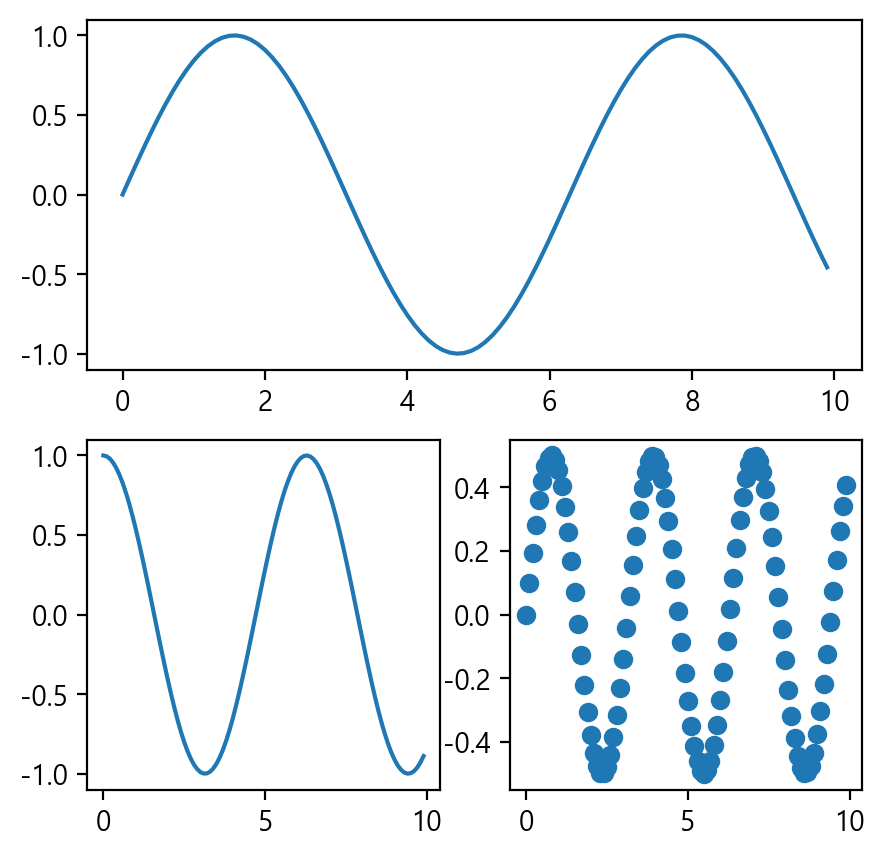

In [4]:
plt.figure(figsize=(5,5))
plt.subplot(2, 1, 1) # 2행1열로 subplot에서 1번째 subplot은 다음과 같이 그린다
plt.plot(x, np.sin(x))
plt.subplot(2, 2, 3) # 2행2열 subplot중 3번째 subplot
plt.plot(x, np.cos(x))
plt.subplot(224) # 2행2열 subplot 중 4번째 subplot
plt.scatter(x, np.sin(x)*np.cos(x))
plt.show()

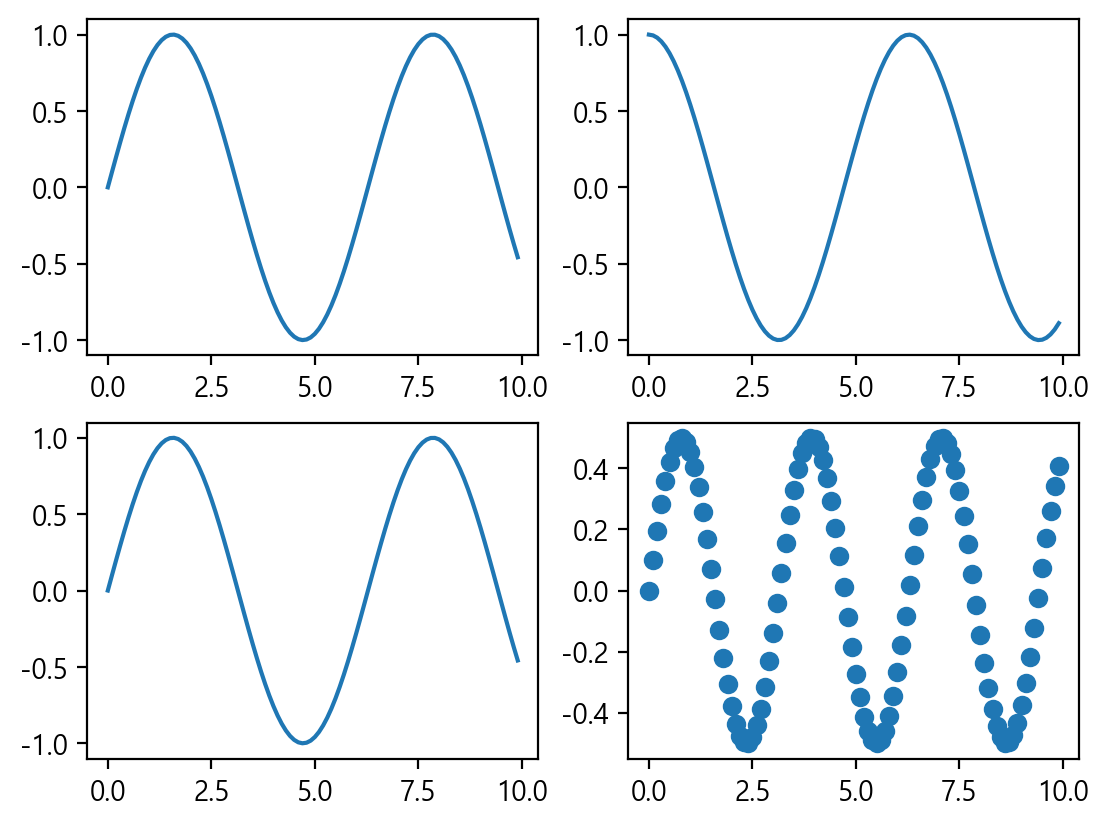

In [5]:
plt.subplot(2, 2, 1); plt.plot(x, np.sin(x))
plt.subplot(2, 2, 2); plt.plot(x, np.cos(x))
plt.subplot(2, 2, 3); plt.plot(x, np.sin(x))
plt.subplot(2, 2, 4); plt.scatter(x, np.sin(x)*np.cos(x))
plt.show()

### 2) subplots()함수로 서브플롯 추가
- plot함수에 색상이나 스타일 조정(교안 14page) https://wikidocs.net/92085

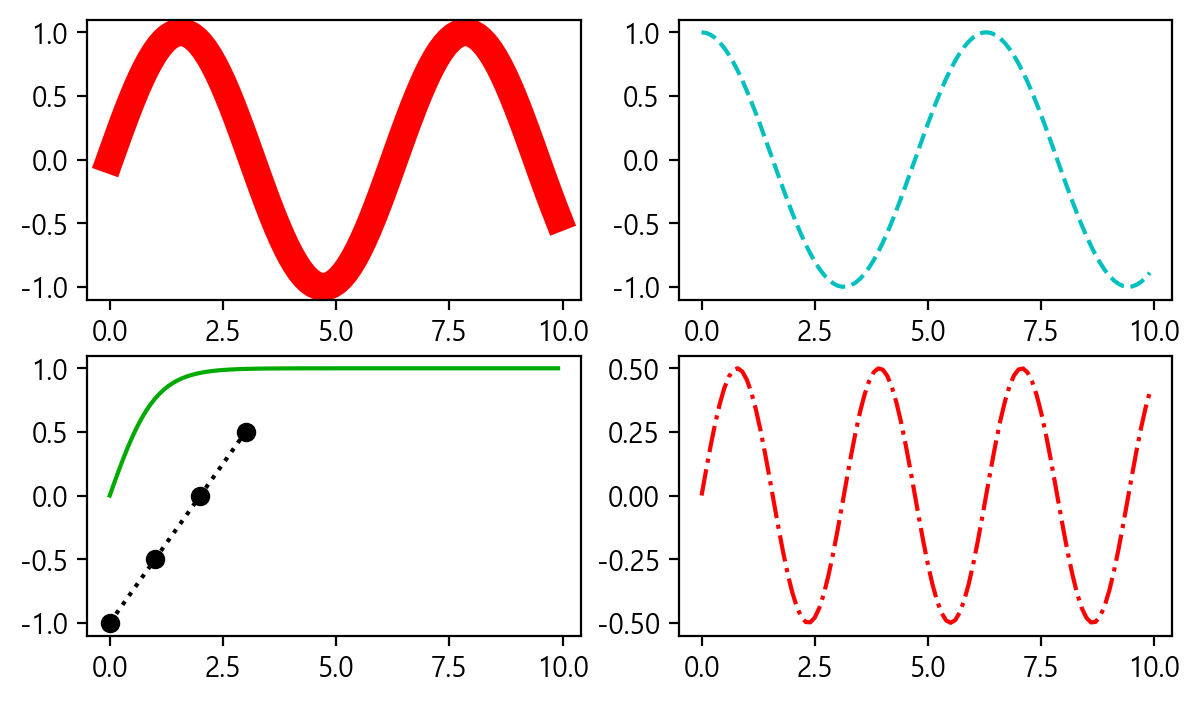

In [6]:
# 2행2열 서브플롯
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7,4))
axes[0,0].plot(x, np.sin(x), c='r', linewidth=10)
axes[0,1].plot(x, np.cos(x), 'c--') #c='c', linestyle='--'
axes[1,0].plot(x, np.tanh(x), '#00AA00')
axes[1,0].plot([0,1,2,3],[-1, -0.5, 0, 0.5], 'ko:')# k:black, marker='o', linestyle=':'
axes[1,1].plot(x, np.sin(x)*np.cos(x), 'r-.')
plt.show()

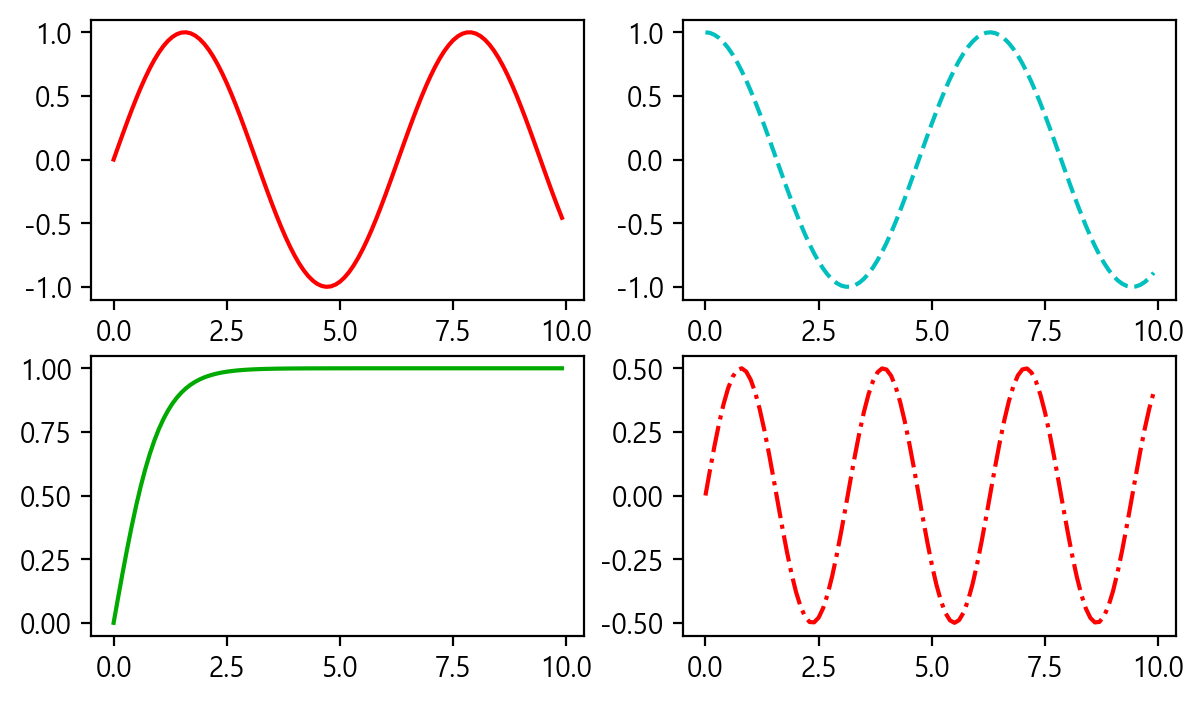

In [7]:
# 2행2열 서브플롯(for)
func = [np.sin, np.cos, np.tanh, lambda x:np.sin(x)*np.cos(x)]
fmt  = ['r', 'c--', '#00AA00', 'r-.']
fig, axes = plt.subplots(2, 2, figsize=(7,4))
list(enumerate(axes.flat))
for i, ax in enumerate(axes.flat):
    ax.plot(x, func[i](x), fmt[i])

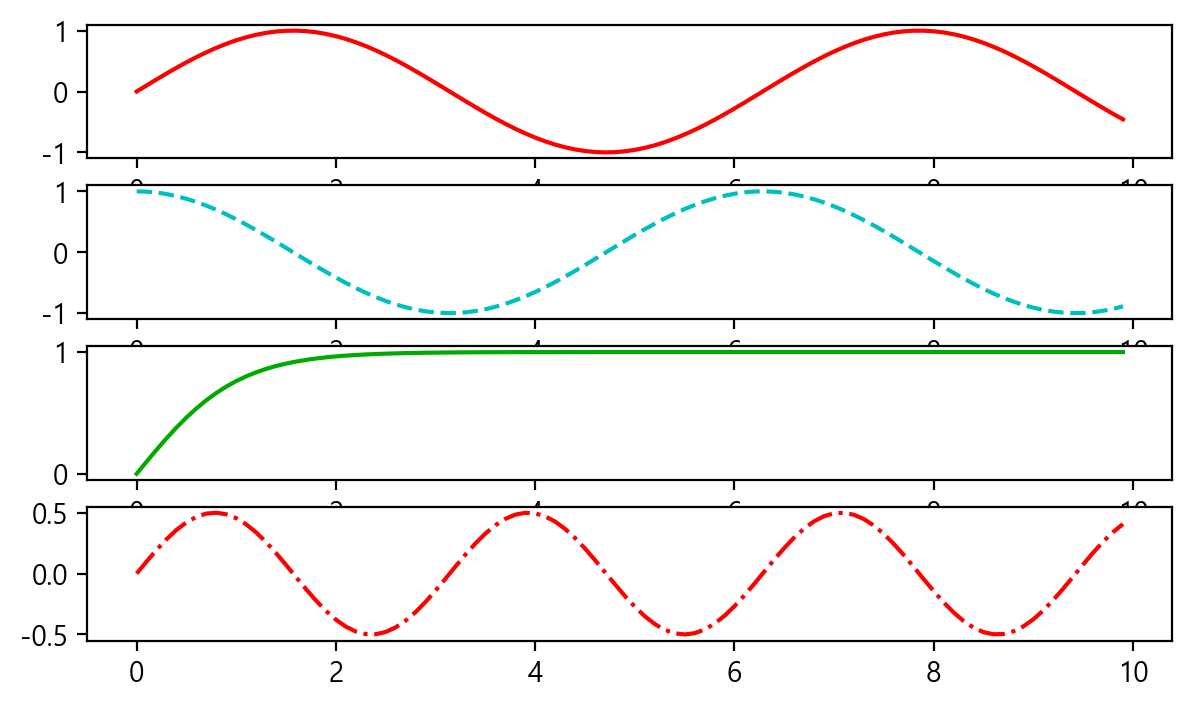

In [8]:
# 4행1열 서브플롯(for)
func = [np.sin, np.cos, np.tanh, lambda x:np.sin(x)*np.cos(x)]
fmt  = ['r', 'c--', '#00AA00', 'r-.']
fig, axes = plt.subplots(4, 1, figsize=(7,4))

for i, ax in enumerate(axes):
    ax.plot(x, func[i](x), fmt[i])

## 1.4 다양한 그래프 그리기
### 1) pyplot 함수들(교안 16page) : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html

### 2)  matplotlib.pyplot.plot() : 선그래프

### 3) pandas.DataFrame.plot()
- plt.____(x, y, fmt)
- df.plot(x=None, y=None, kind='line', figsize=None, title=None, grid=None)
    * kind : line(기본값), scatter(점도표), bar, barh, density, hist, pie(한컬럼만)....

In [9]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.sample()

,sepal_length,sepal_width,petal_length,petal_width,species
44,5.1,3.8,1.9,0.4,setosa


- 교안(20page) https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot : 범례사용

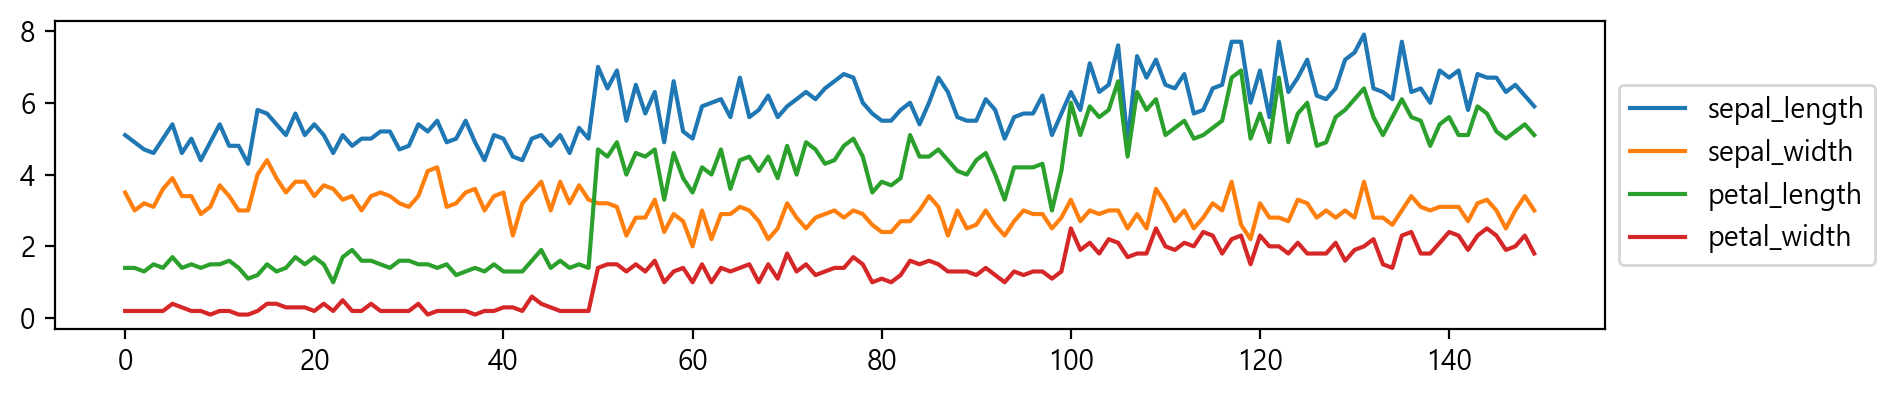

In [10]:
# plt.figure(figsize=(8, 2))
# plt.plot(iris.index, iris.iloc[:,:-1])
ax = iris.plot(kind='line', figsize=(10, 2))
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

- 교안21page : https://matplotlib.org/stable/tutorials/colors/colormaps.html (colormap)

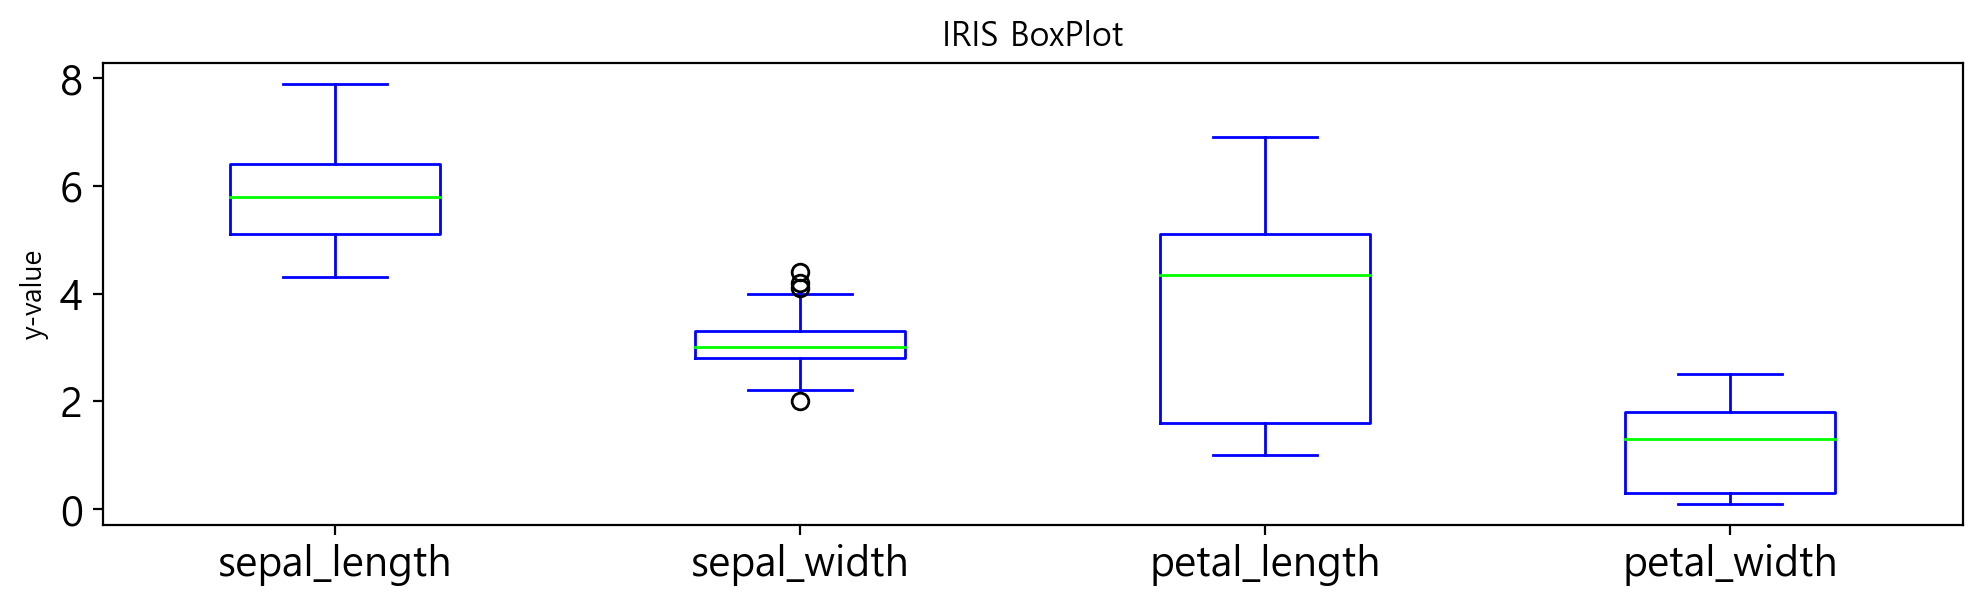

In [11]:
iris.plot(kind='box', figsize=(12,3), title='IRIS BoxPlot',
         ylabel='y-value', fontsize=15, colormap='brg')
plt.show()

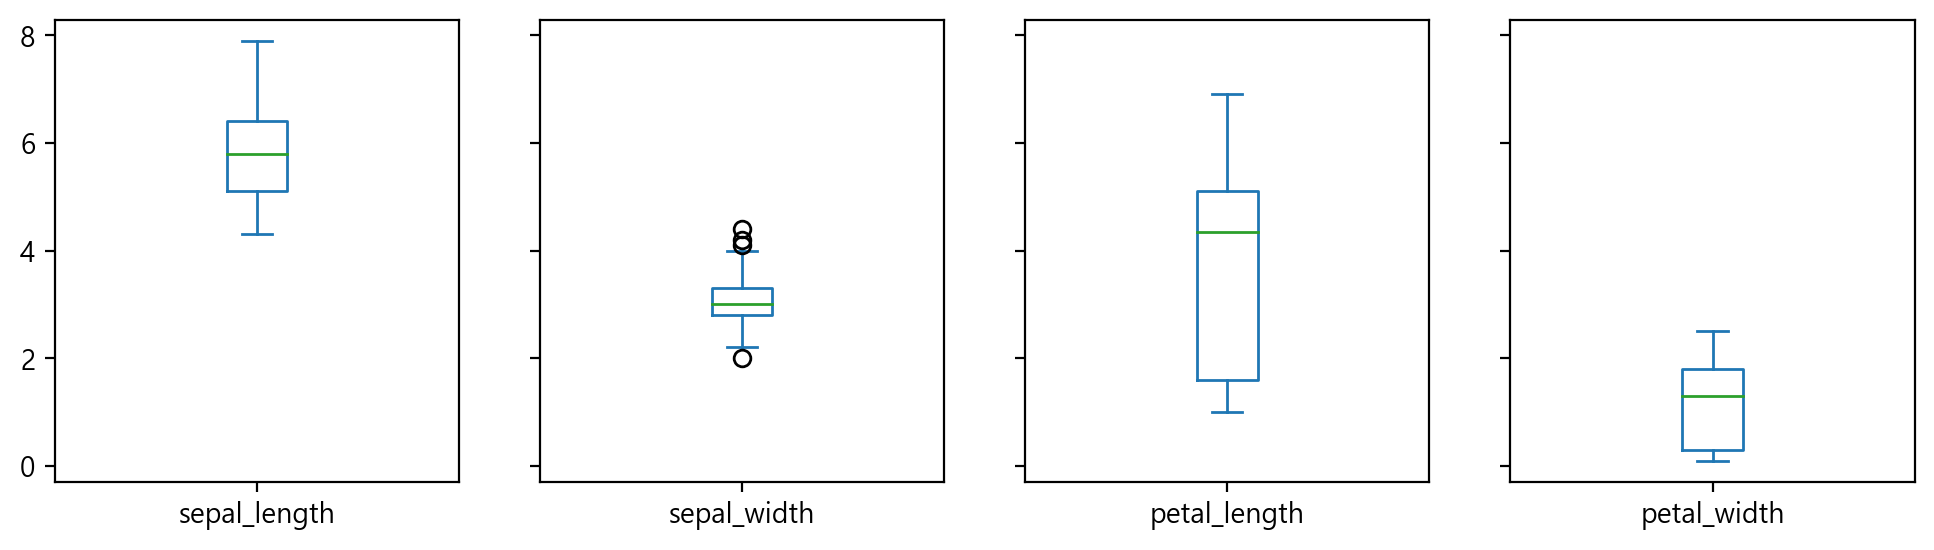

In [12]:
iris.plot(kind='box', figsize=(12,3), subplots=True, sharey=True)
plt.show()

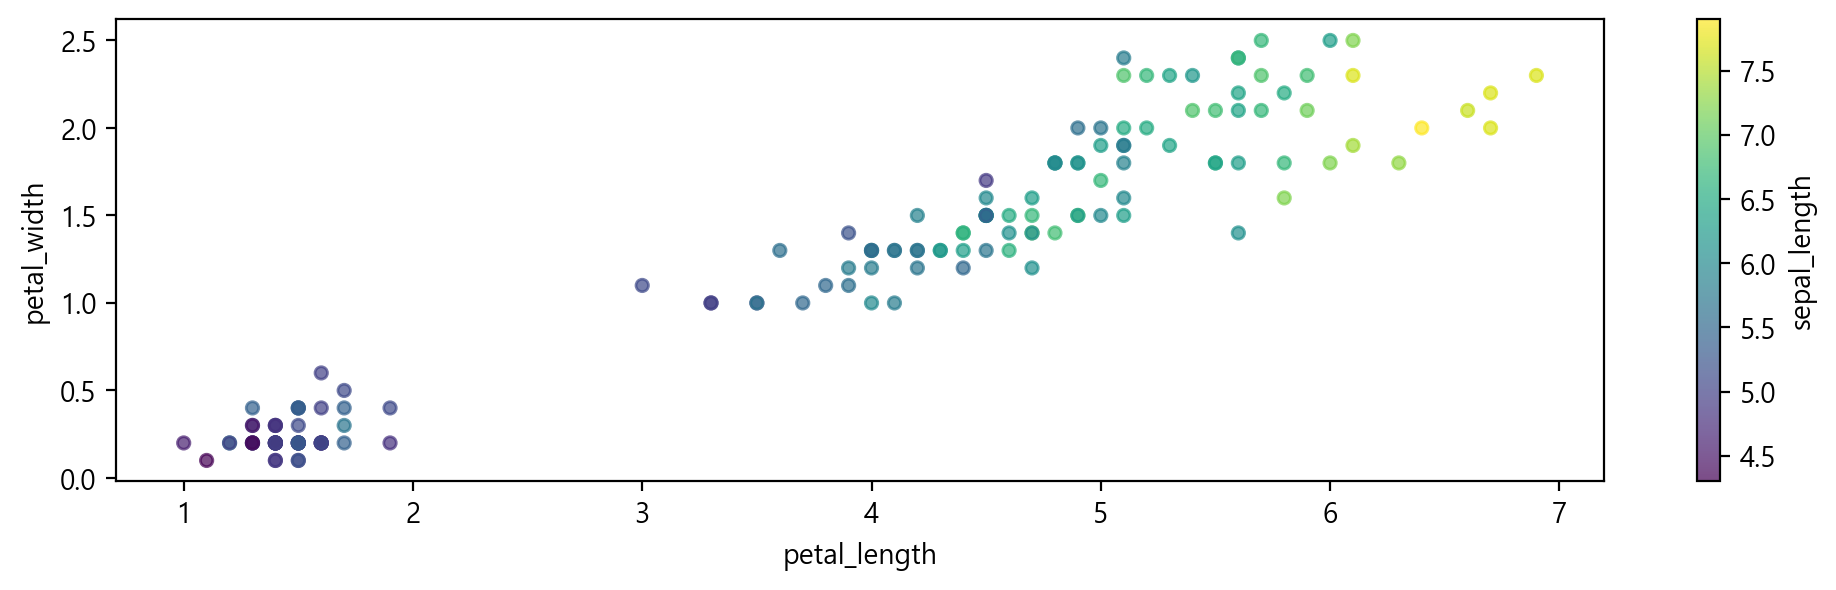

In [13]:
iris.plot(kind='scatter', x='petal_length', y='petal_width', figsize=(12, 3),
         c='sepal_length',
         alpha=0.7)
plt.show()

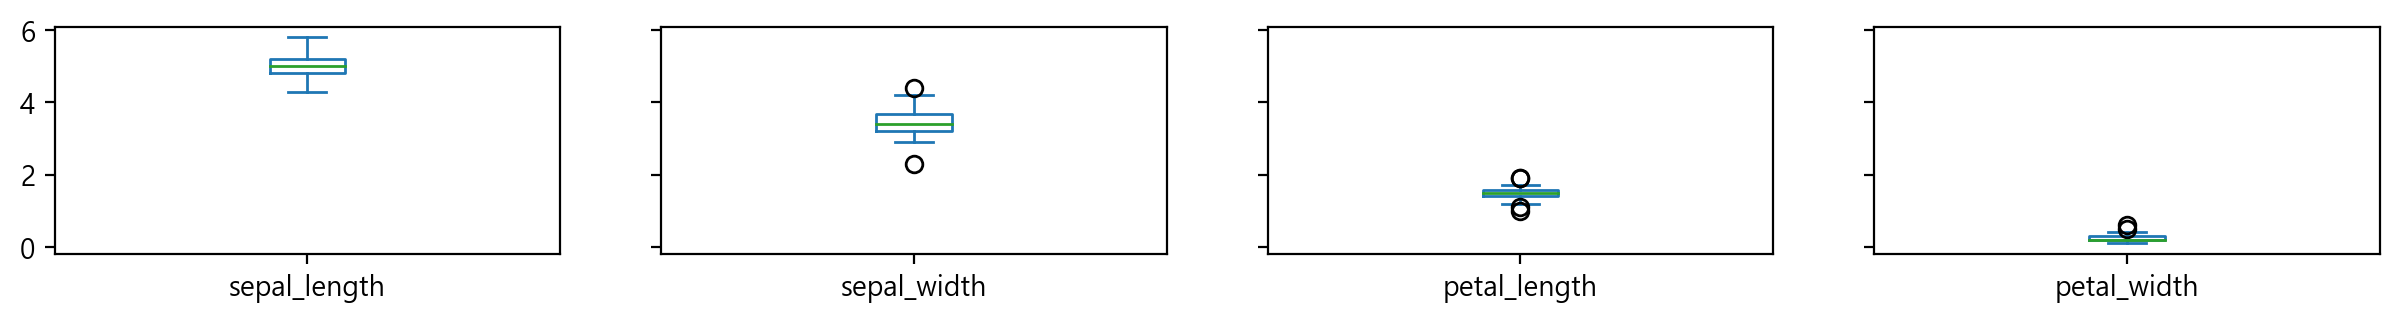

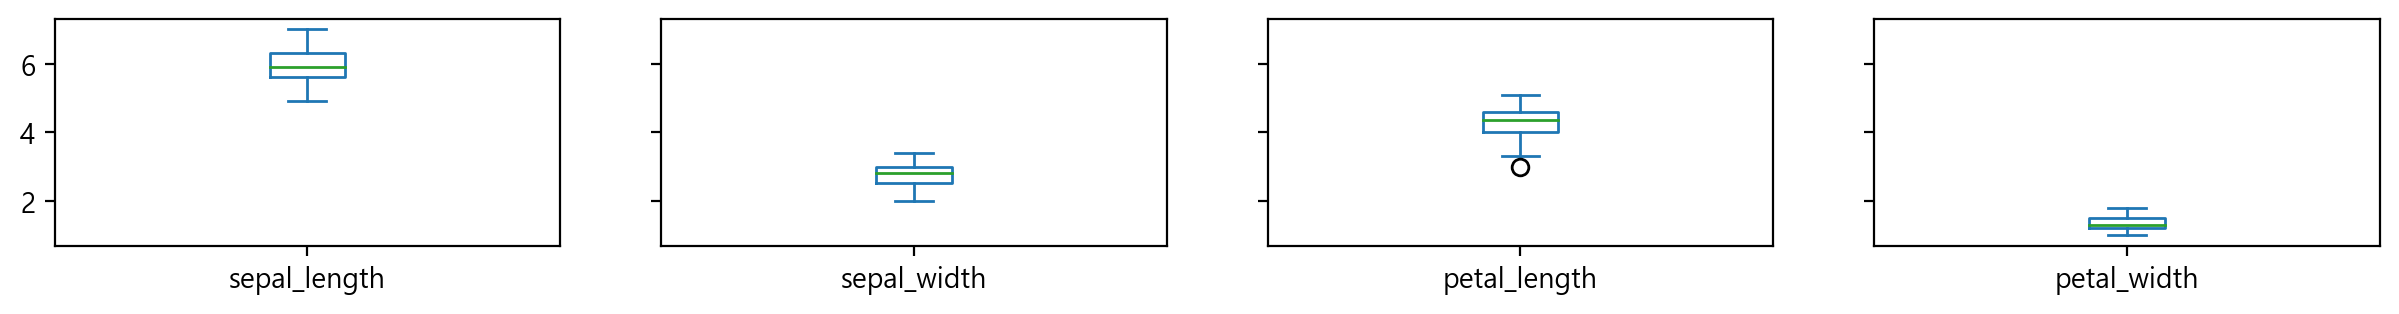

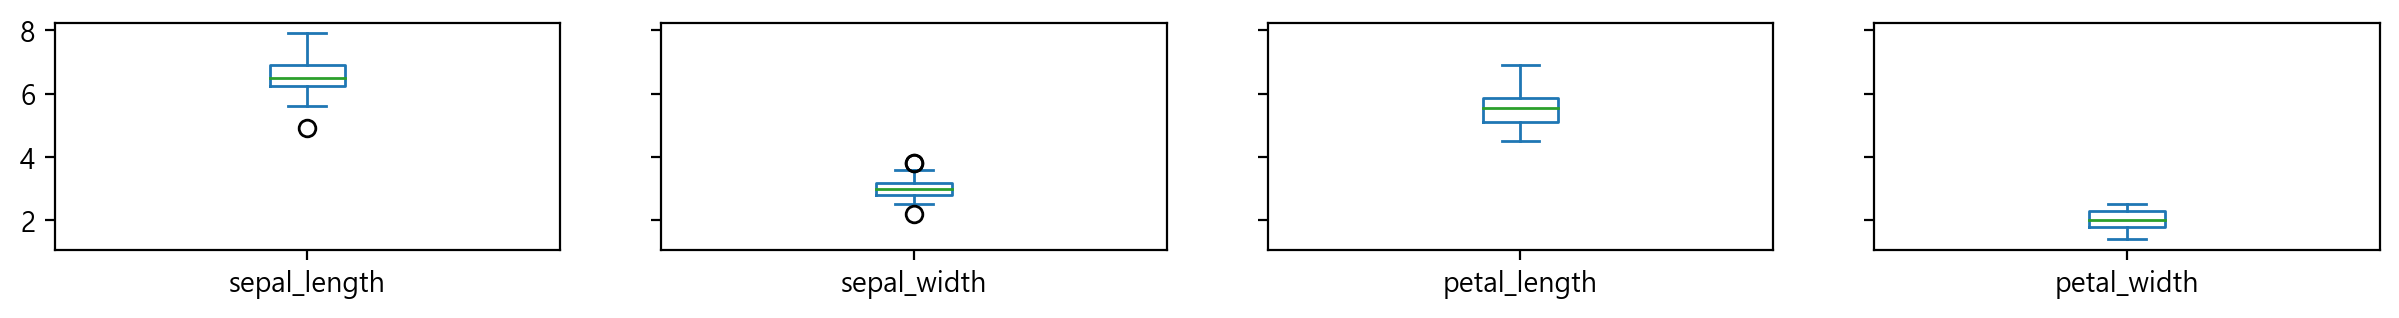

In [14]:
# 종별 boxplot
iris.groupby('species').plot(kind='box', figsize=(15,5),
                            subplots=True,
                            layout=(3, 4),
                            sharey=True)
plt.show()

### 4) plt.scatter() :  산점도

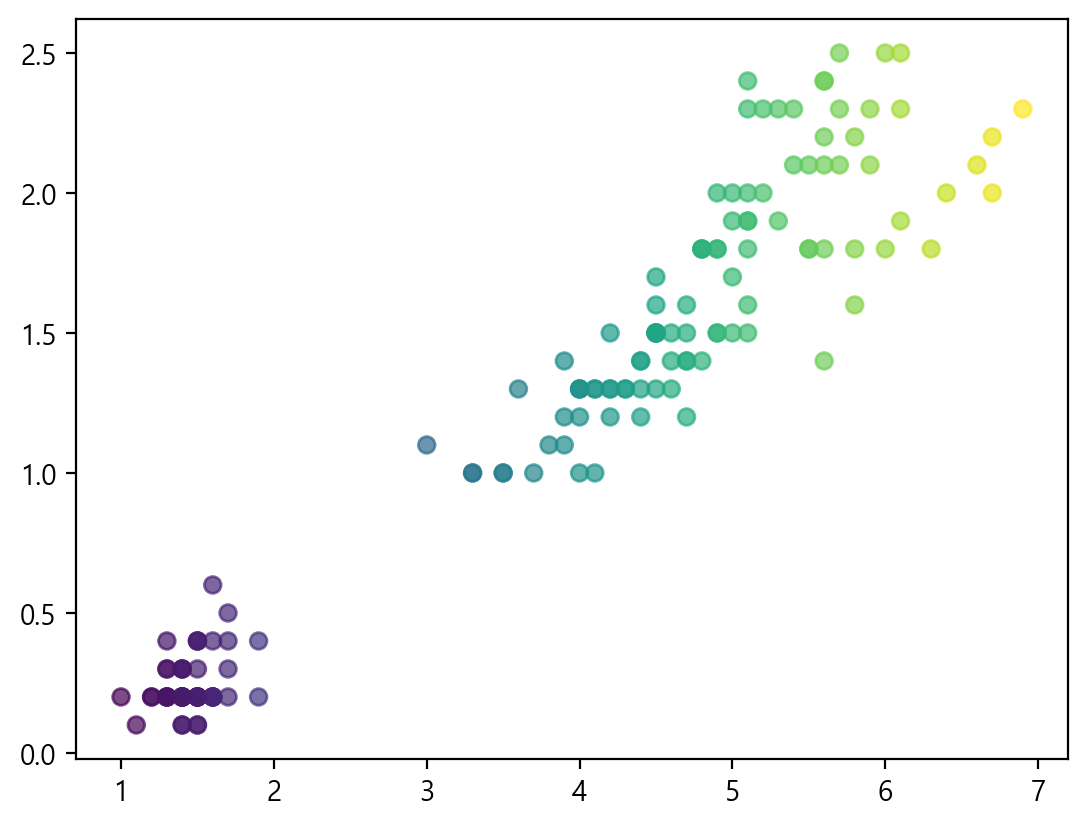

In [15]:
plt.scatter(iris.petal_length, iris.petal_width,
           c = iris.petal_length*20,
           alpha=0.7)

## 1.5 그 외 그래프 그리기
### 1) boxplot(분포를 몰라) vs. violinplt
- https://www.research.autodesk.com/publications/same-stats-different-graphs 
동일한 통계, 다른 그래프(교안1page)

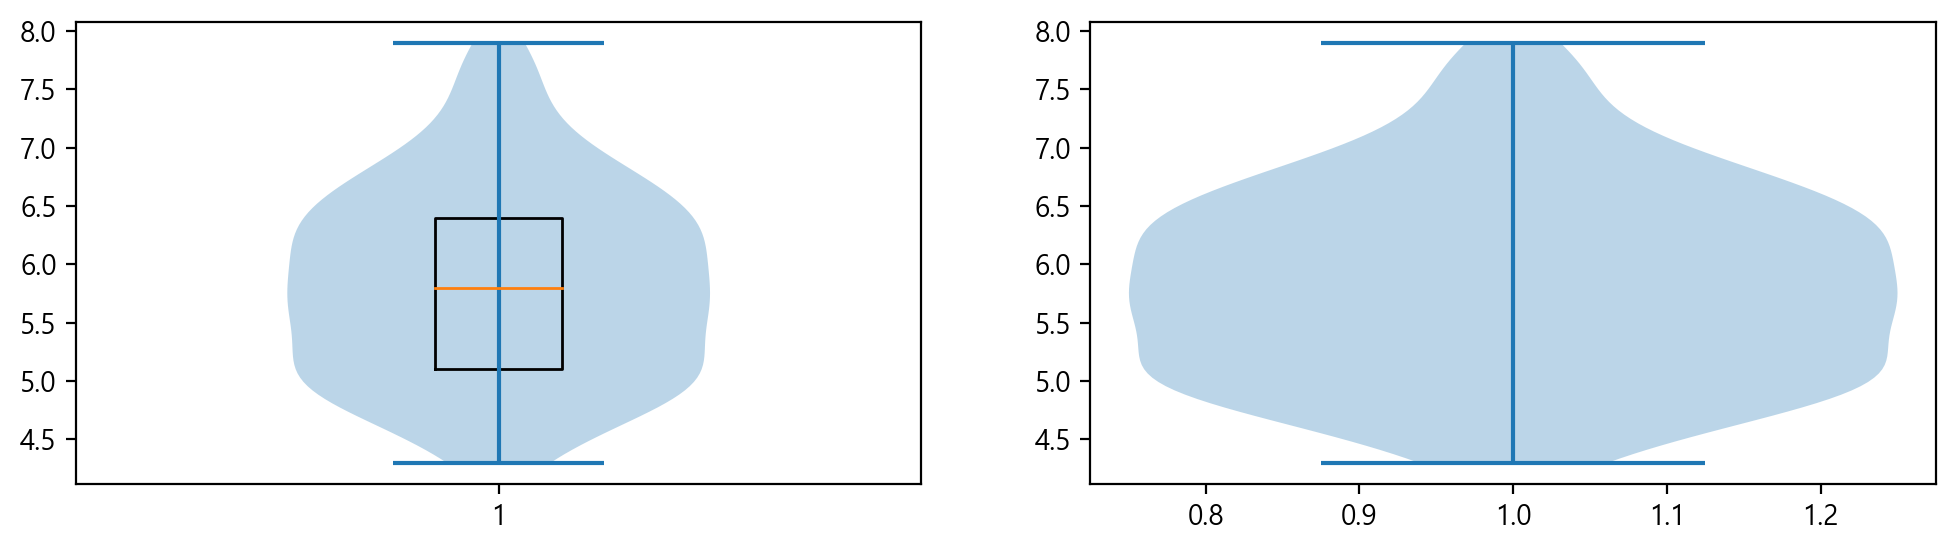

In [16]:
fig, axes = plt.subplots(ncols=2, figsize=(12,3))
axes[0].boxplot(iris.sepal_length)
axes[0].violinplot(iris.sepal_length)
axes[1].violinplot(iris.sepal_length)
plt.show()

### 2) bar(), barh()

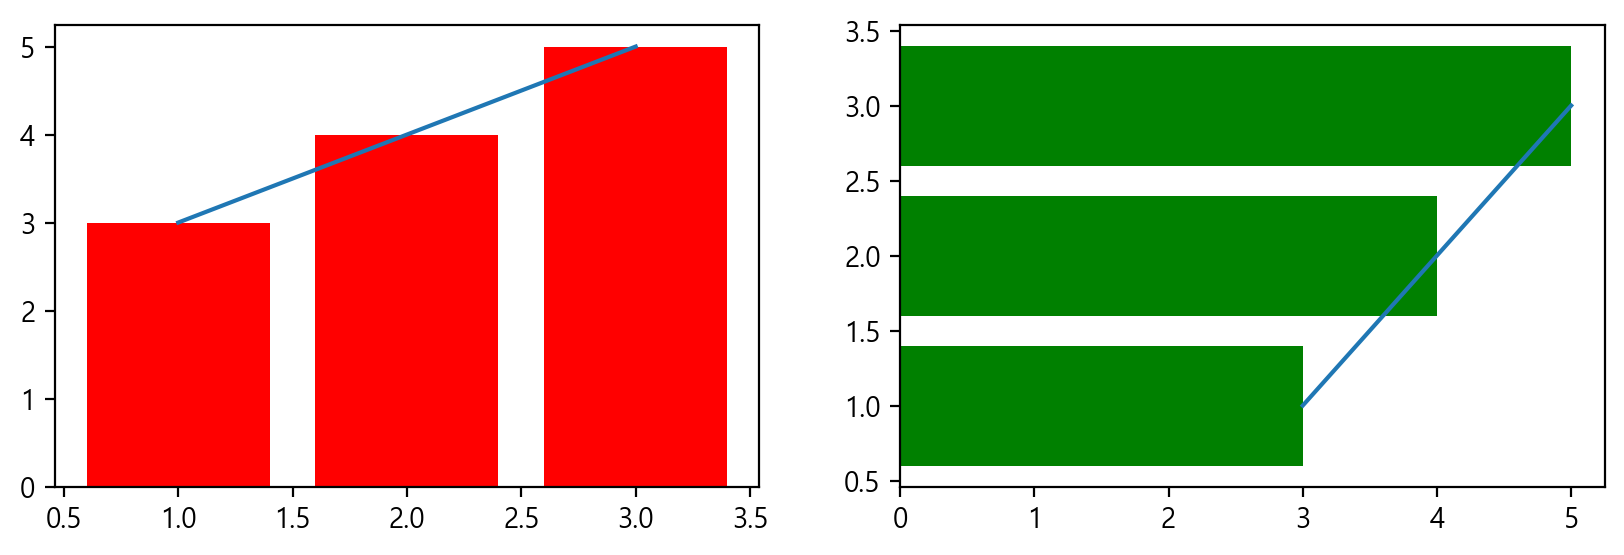

In [17]:
x = [1, 2, 3]
y = [3, 4, 5]
fig, axes = plt.subplots(ncols=2, figsize=(10,3))
axes[0].bar(x, y, color='r')
axes[0].plot(x, y)
axes[1].barh(x, y, color='g')
axes[1].plot(y, x)
plt.show()

### 3) hist(도수분포표, 히스토그램) 
- 1차원

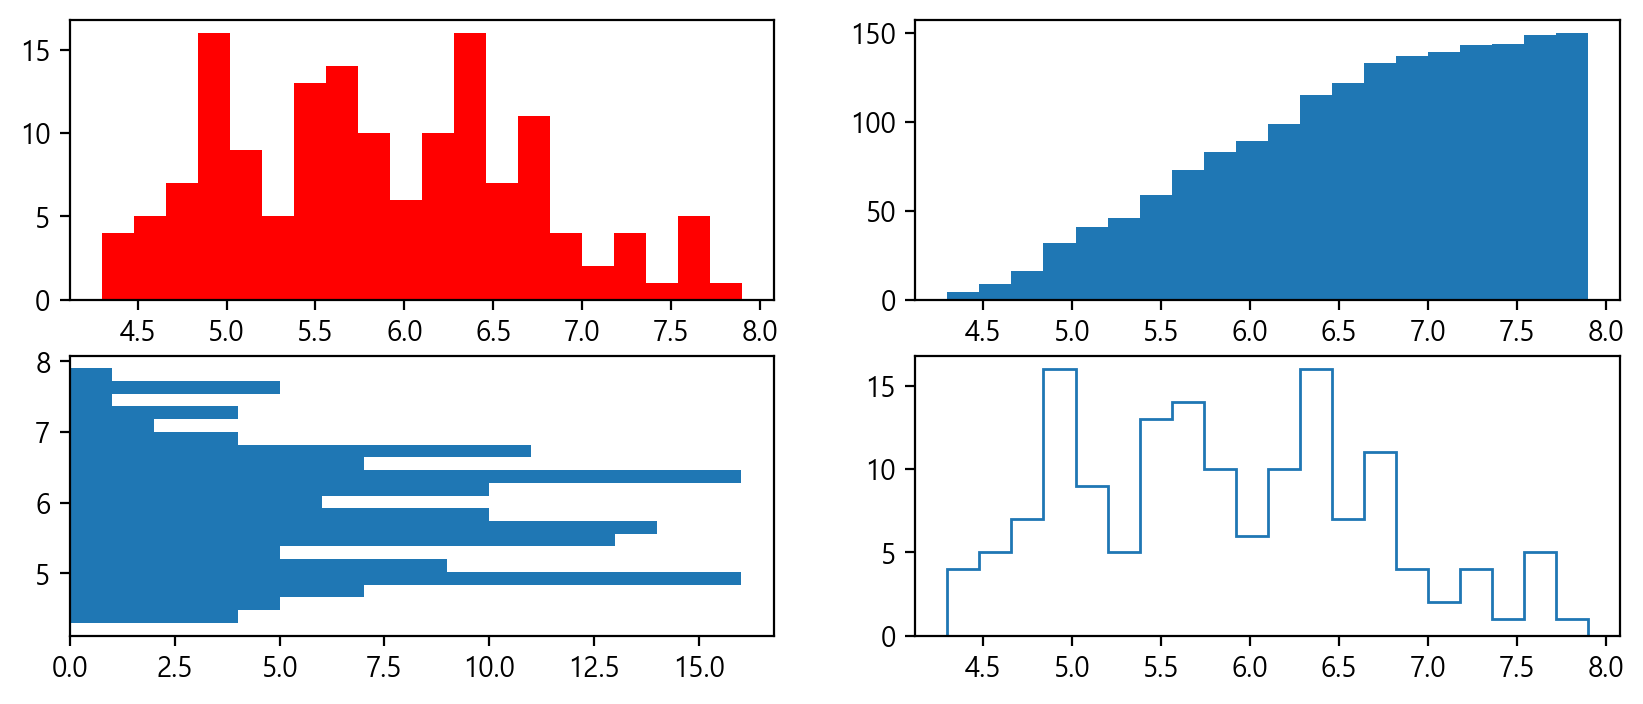

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,4))
axes[0,0].hist(iris.sepal_length, bins=20, color='r') # 히스토그램
axes[0,1].hist(iris.sepal_length, bins=20, cumulative=True) # 누적 히스토그램
axes[1,0].hist(iris.sepal_length, bins=20, orientation='horizontal')
axes[1,1].hist(iris.sepal_length, bins=20, histtype='step')
# plt.hist?
plt.show()

### 4) axvline(), axhline(), fill(), fill_between()

In [19]:
import numpy as np

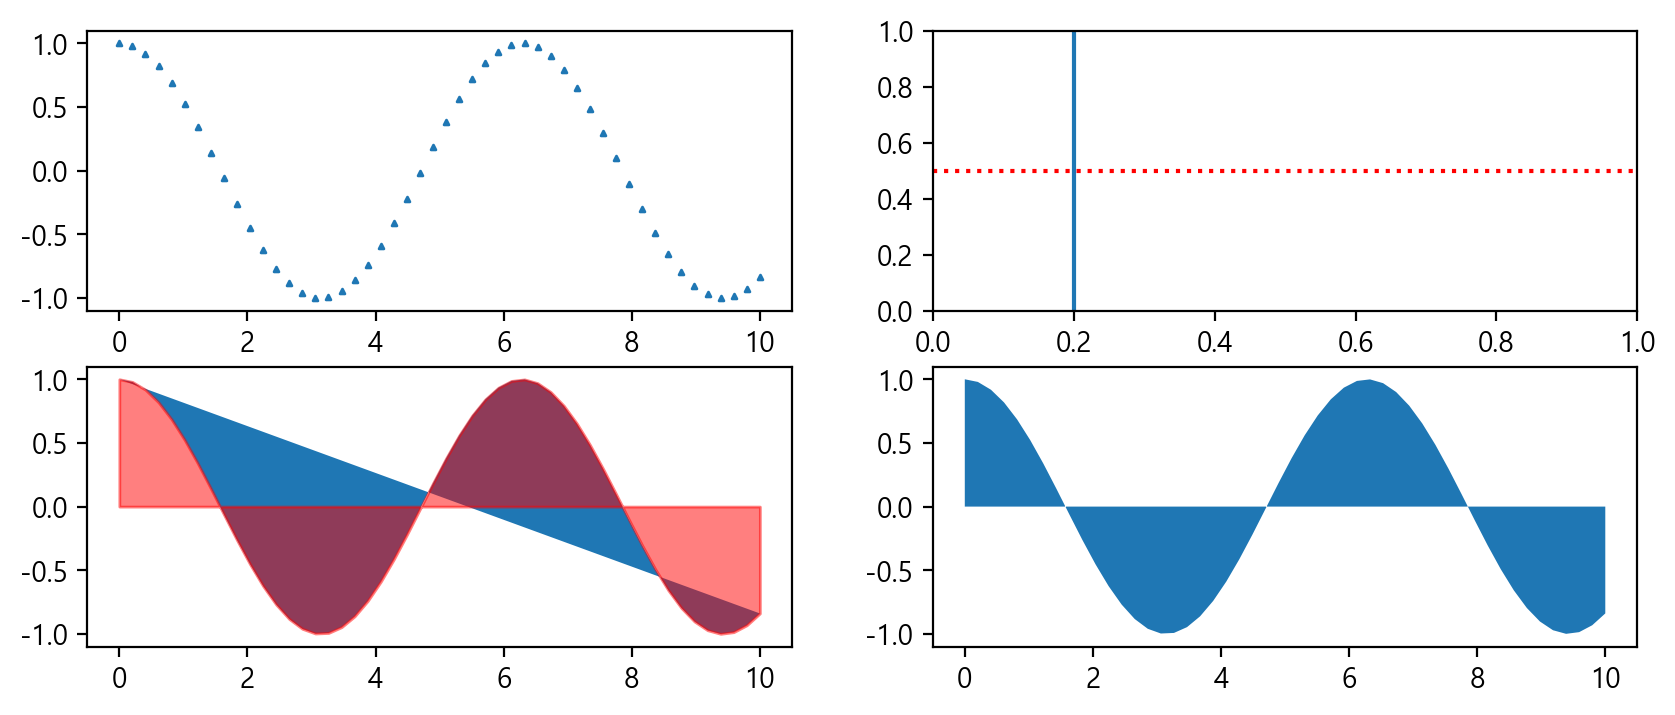

In [20]:
x = np.linspace(0, 10) # 0부터 10까지 일정한 간격으로 50(기본값)개 수 추출
y = np.cos(x)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,4))
axes[0,0].scatter(x, y, s=3, marker='^')
axes[0,1].axvline(0.2)
axes[0,1].axhline(0.5, color='r', linestyle=':')
axes[1,0].fill(x, y)
axes[1,0].fill_between(x, y, color='r', alpha=0.5)
axes[1,1].fill_between(x, y)

### 5) pie
- 1차원

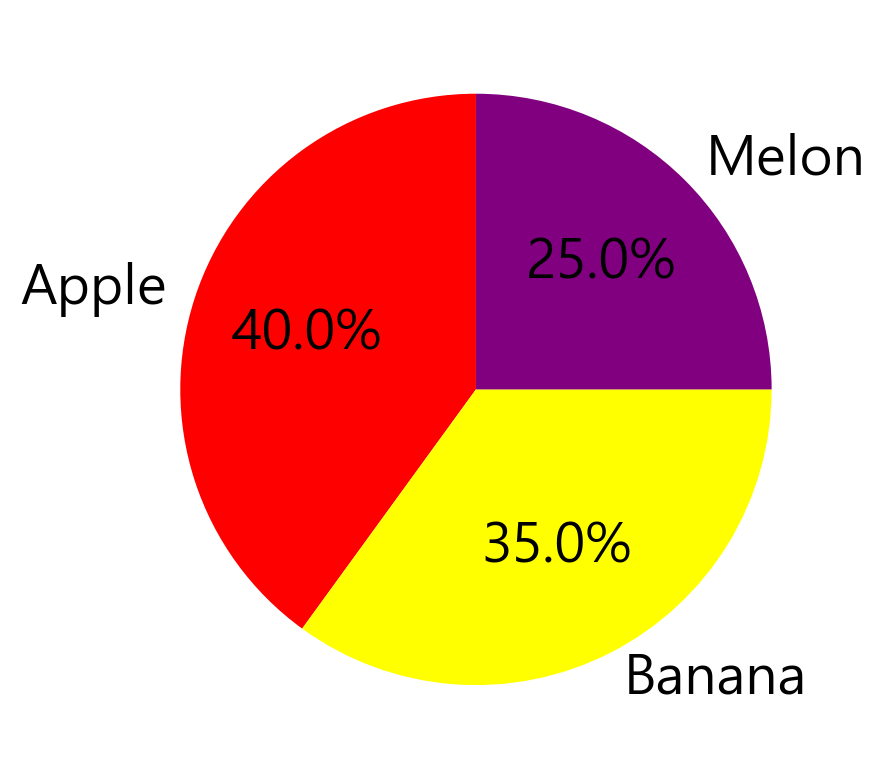

In [21]:
x = [40,35,25]
labels = ['Apple', 'Banana', 'Melon']
colors = ['red', 'yellow', 'purple']
plt.pie(x, labels=labels, autopct='%.1f%%', startangle=90, colors=colors,
       textprops={'fontsize':20})
plt.show()

## 1.6 그래프 커스터마이징
### 1) linestyle, linewidth, color, marker
### 2) text(), annotate()
참고 : https://matplotlib.org/api/axes_api.html#text-and-annotations

In [22]:
# 한글 기본 폰트 설정
plt.rc('font', family='Malgun Gothic') # 윈도우즈
# plt.rc('font', family='AppleGothic') # mac
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지

In [23]:
# 한글 특정 폰트 설정
from matplotlib.font_manager import FontProperties
font_file = 'C:/Windows/Fonts/HMFMPYUN.TTF'
font_prop = FontProperties(fname=font_file, size=15)

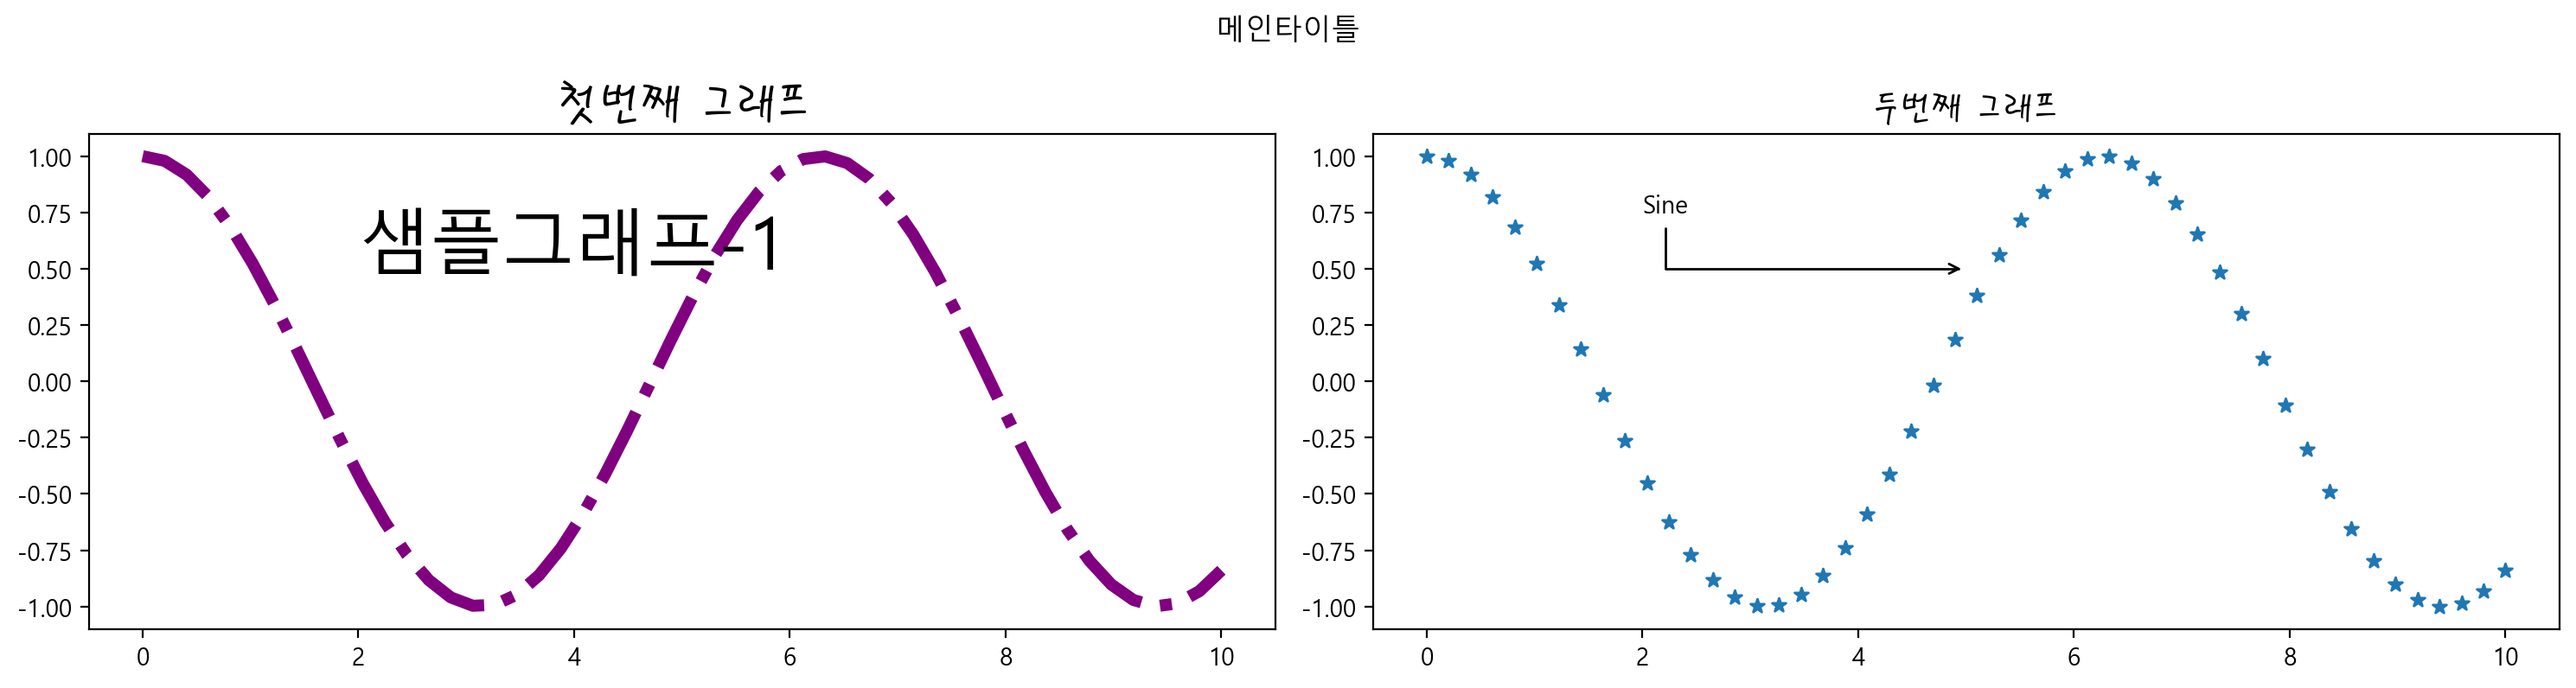

In [24]:
x = np.linspace(0, 10) # num=50
y = np.cos(x)
# warnings.filterwarnings(action='default') # warning 띄우기
fig, axes = plt.subplots(ncols=2, figsize=(15,4))
axes[0].plot(x, y, linewidth=5, linestyle='-.', color='purple')
axes[0].text(2, 0.5, '샘플그래프-1', fontsize=30)
axes[0].set_title('첫번째 그래프', fontproperties=font_prop, fontsize=20)

axes[1].scatter(x, y, marker='*')
axes[1].annotate('Sine', xytext=(2, 0.75), # 글자와 글자가 있을 좌표
                xy=(5, 0.5), # 화살표가 가리킬 좌표
                arrowprops=dict(arrowstyle='->',
                               connectionstyle='angle') # angle3, angle, arc
                )
axes[1].set_title('두번째 그래프', fontproperties=font_prop)
plt.suptitle('메인타이틀')
plt.tight_layout() # 서브플롯 레이아웃 조정
plt.show()

### 3) 수학기호
- 교안30page : 참고 : https://matplotlib.org/users/mathtext.html

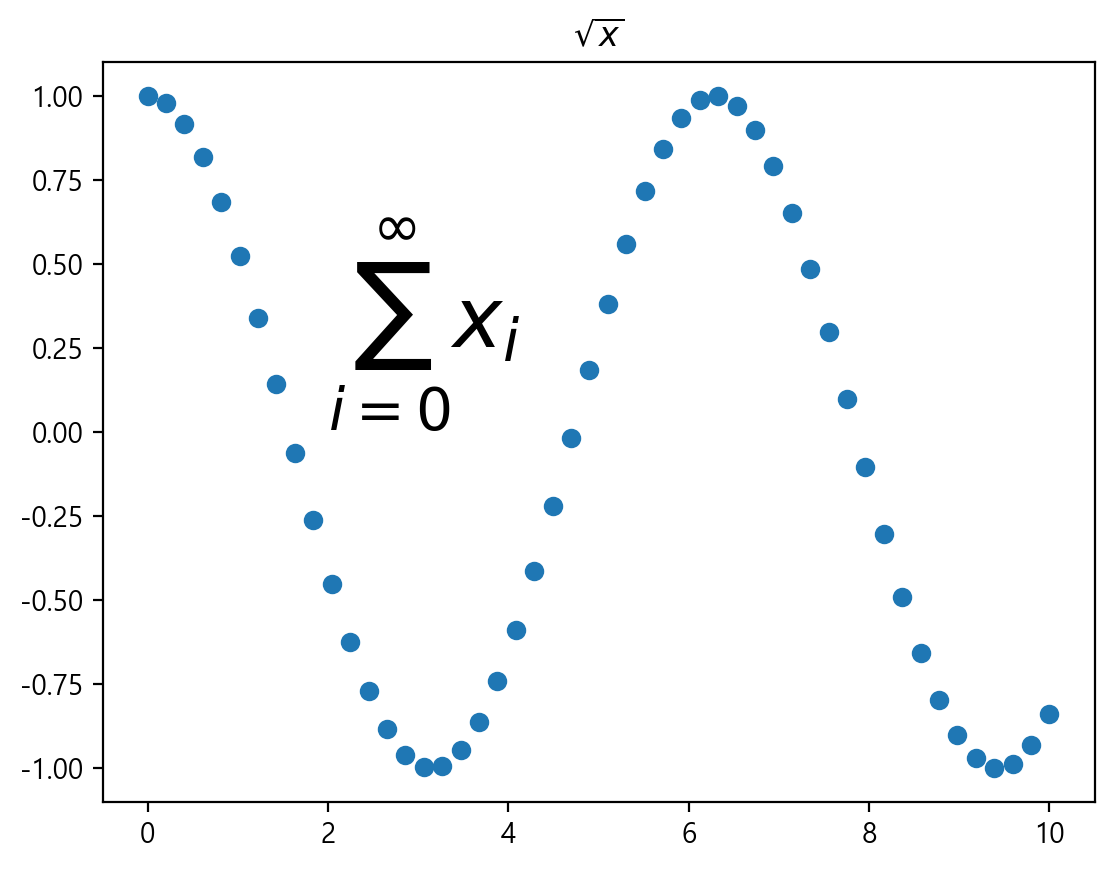

In [25]:
plt.scatter(x, y)
plt.text(2, 0.25, r'$\sum_{i=0}^\infty x_i$', fontsize=30)
plt.title(r'$\sqrt{x}$')
plt.show()

### 4) 축과 눈금
- 교안 33page : https://matplotlib.org/3.1.0/api/axis_api.html 

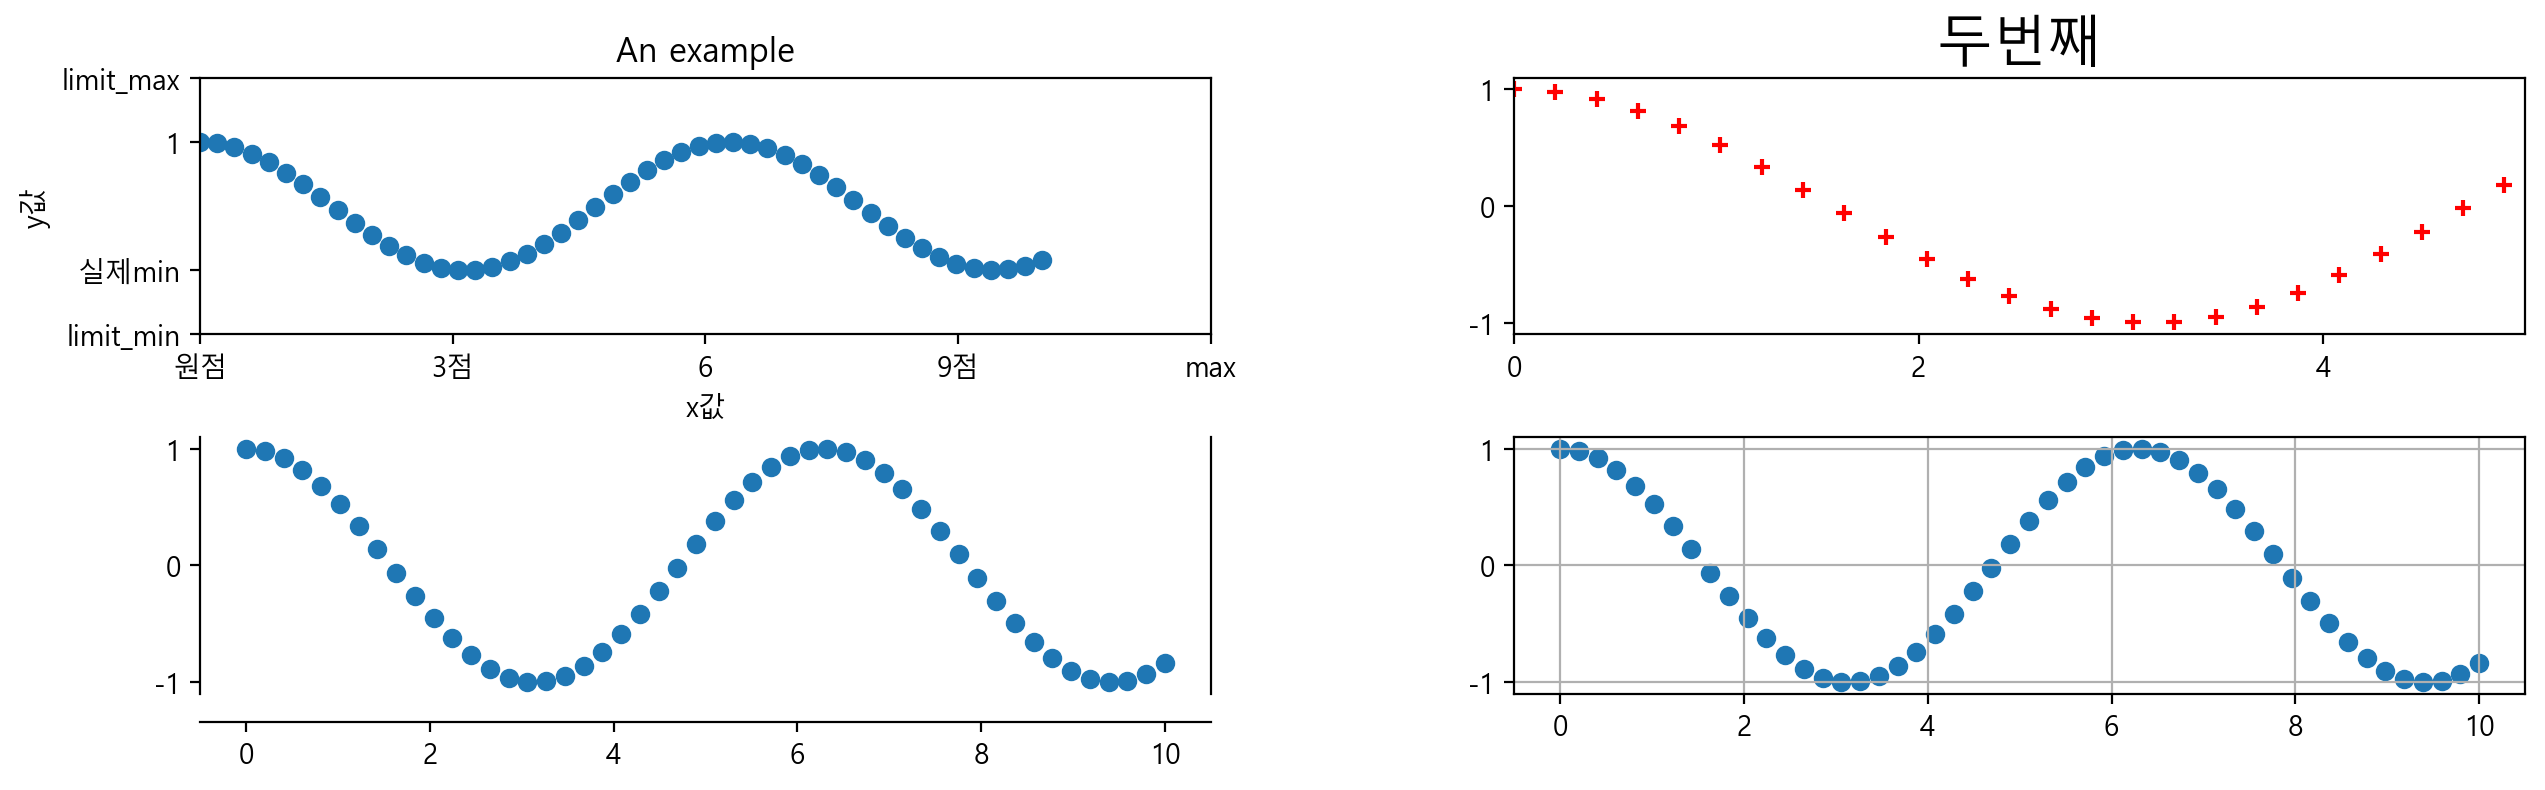

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,4))
# 서브플롯끼리 여백 조정(title, x축 label)
plt.subplots_adjust(hspace=0.4, wspace=0.3) # hspace(위아래여백, 1은 서브플롯높이)
                                            # wspace(좌우여백, 1은 서브플롯너비)
axes[0,0].scatter(x, y)
axes[0,0].set(title='An example',
             ylabel='y값', xlabel='x값',
             xlim = [0, 12], # x축 눈금 범위
             xticks = [0, 3, 6, 9, 12], # x축 눈금
             xticklabels = ['원점','3점', 6, '9점', 'max'], # x축 눈금 라벨
             ylim = [-2, 2],
             yticks = [-2, -1, 1, 2],
             yticklabels = ['limit_min', '실제min', 1, 'limit_max'] )
axes[0,1].scatter(x, y, color='r', marker='+')
axes[0,1].set_title('두번째', fontsize=20)
axes[0,1].set_xlim([0,5])
axes[0,1].set_xticks(range(0,6,2))
axes[1,0].scatter(x, y)
axes[1,0].spines['top'].set_visible(False)
axes[1,0].spines['bottom'].set_position( ('outward',10) ) # 10pt만큼 바깥쪽으로 이동
axes[1,1].scatter(x,y)
axes[1,1].grid(True)
plt.show()

### 5) 축공유 ★

In [27]:
import numpy as np
x = np.arange(0, 10)
y1 = 0.5*x ** 2
y2 = -y1

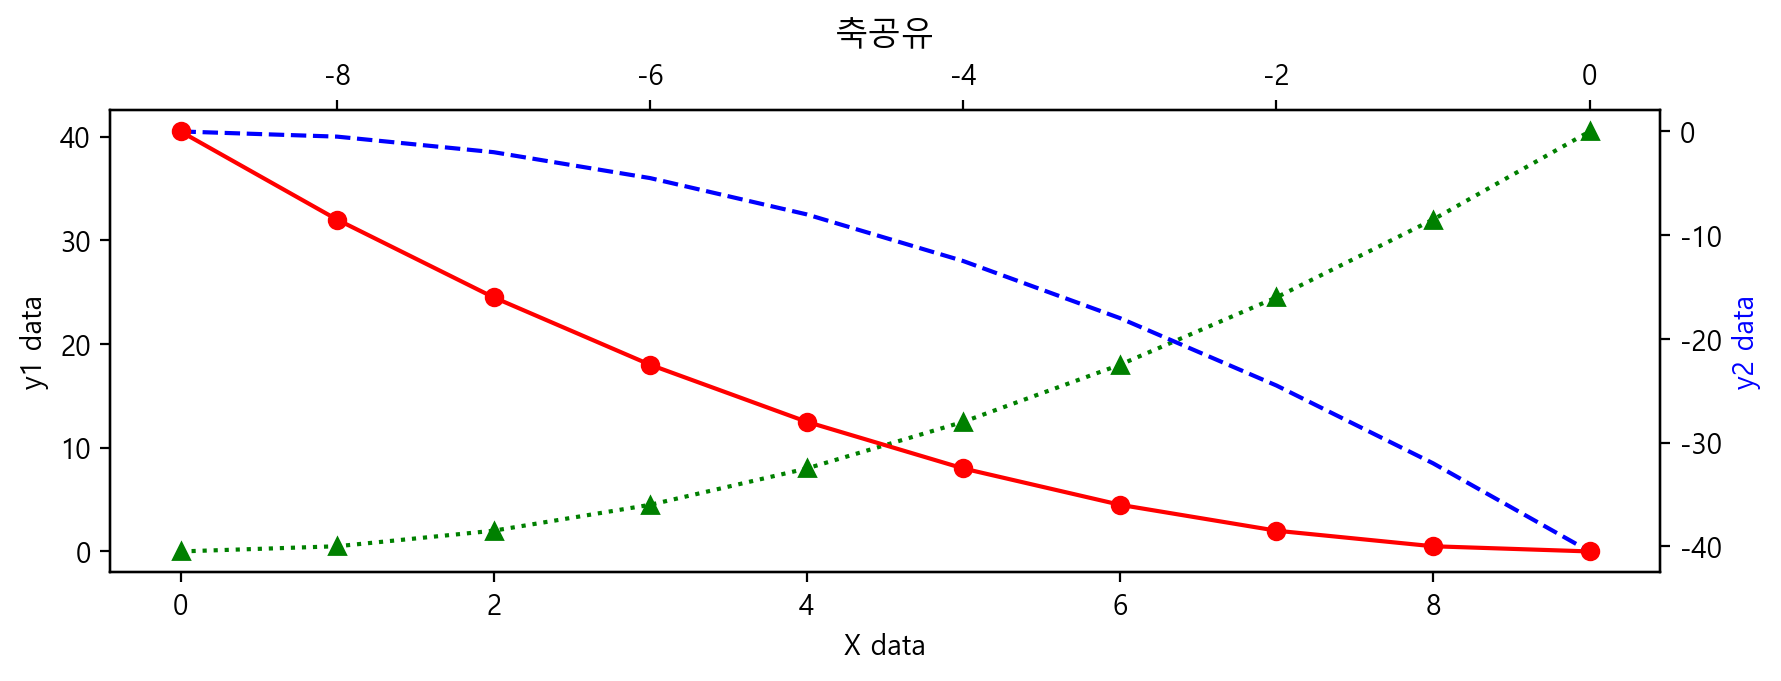

In [28]:
fig, ax1 = plt.subplots(figsize=(10,3))
ax1.plot(x, y1, 'g^:')
ax1.set(title='축공유', xlabel = 'X data', ylabel='y1 data')

ax2 = ax1.twinx() # ax1과 x축을 공유하는 ax2
ax2.plot(x, y2, 'b--')
ax2.set_ylabel('y2 data', color='b')

ax3 = ax1.twiny() # ax1과 y축을 공유하는 ax3
ax3.plot(-x, y1, 'ro-')
plt.show()

### 6) 범례표시
### 7) 플롯스타일 지정

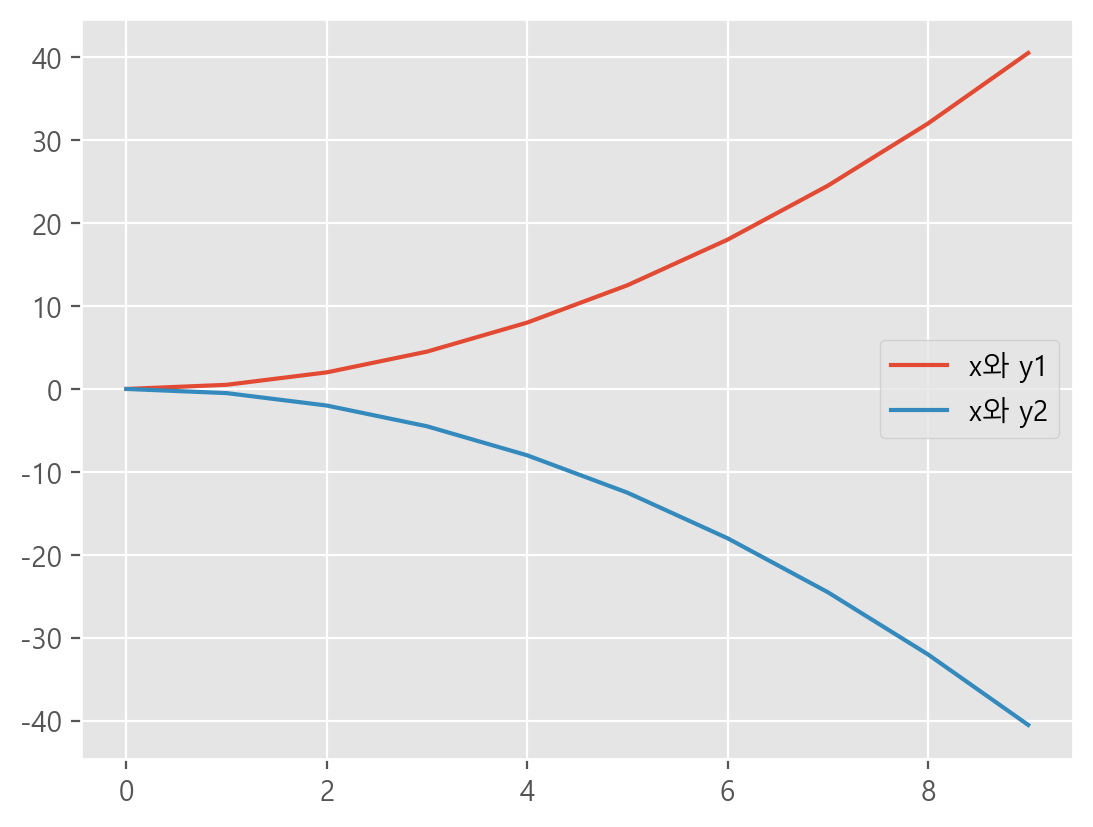

In [29]:
plt.style.use("ggplot") # default, ggplot, classic, ....
plt.plot(x, y1, label='x와 y1')
plt.plot(x, y2, label='x와 y2')
plt.legend(loc='center right')
plt.show()